In [8]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 

df = pd.read_csv('movies.csv', encoding = "ISO-8859-1")

<h2>Problema 2</h2>

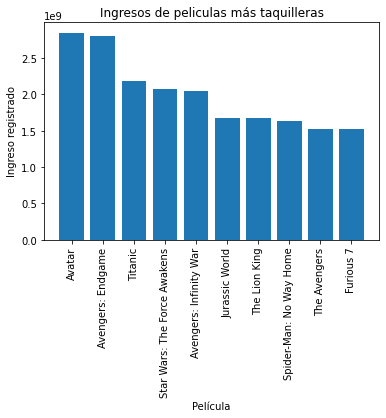

,id,title,revenue
3210,19995,Avatar,2.847246e+09
5952,299534,Avengers: Endgame,2.797801e+09
307,597,Titanic,2.187464e+09
4947,140607,Star Wars: The Force Awakens,2.068224e+09
5953,299536,Avengers: Infinity War,2.046240e+09
4914,135397,Jurassic World,1.671713e+09
7134,420818,The Lion King,1.667635e+09
9049,634649,Spider-Man: No Way Home,1.631853e+09
3397,24428,The Avengers,1.518816e+09
5087,168259,Furious 7,1.515048e+09


In [18]:
mclean = df.loc[:, ["id", "title", "revenue"]]
topmovies = mclean.nlargest(10, "revenue")

plt.bar(topmovies["title"], topmovies["revenue"])
plt.xticks(rotation=90)
plt.title('Ingresos de peliculas más taquilleras')
plt.xlabel('Película')
plt.ylabel('Ingreso registrado')
plt.show()
plt.close('all')

display(topmovies)

<h2>Problema 5</h2>

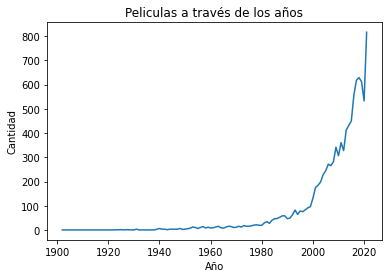

In [7]:
df = df[~df.releaseDate.str.contains("2022")]
df['year'] = pd.DatetimeIndex(df['releaseDate']).year
year = df['year'].value_counts().reset_index()
data = pd.DataFrame(year).sort_values(by = "index")

plt.plot(data['index'], data['year'])
plt.title('Peliculas a través de los años')
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()
plt.close('all')

<h2>Problema 8</h2>

<h3>Pregunta 1</h3>

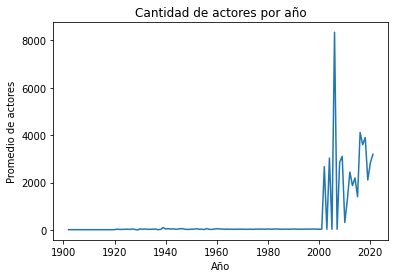

,year,actorsAmount
0,1902,11.000000
1,1920,11.000000
2,1921,35.000000
3,1922,20.000000
4,1925,31.500000
...,...,...
93,2017,3593.011327
94,2018,3896.748808
95,2019,2107.874183
96,2020,2832.315197


In [15]:
df = df[~df.releaseDate.str.contains("2022")]
df['year'] = pd.DatetimeIndex(df['releaseDate']).year
cleaned = df.loc[:, ["year", "actorsAmount"]]
grouped_df = cleaned.groupby("year").mean().reset_index()

plt.plot(grouped_df['year'].values, grouped_df['actorsAmount'].values)
plt.title('Cantidad de actores por año')
plt.xlabel('Año')
plt.ylabel('Promedio de actores')
plt.show()
plt.close('all')
display(grouped_df)

<h3>Pregunta 2</h3>

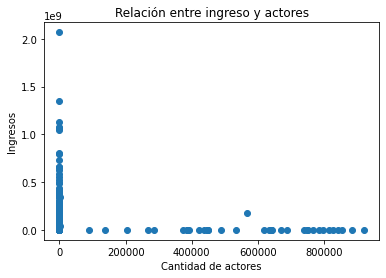

,actorsAmount,revenue
0,0,2.734985e+06
1,1,1.412042e+05
2,2,1.305971e+05
3,3,1.589831e+05
4,4,2.872344e+06
...,...,...
197,825491,0.000000e+00
198,840964,0.000000e+00
199,853253,0.000000e+00
200,882878,0.000000e+00


In [48]:
df.dropna(subset = ["actorsAmount"], inplace=True)
cleaned = df.loc[:, ["actorsAmount", "revenue"]]
grouped_df = cleaned.groupby("actorsAmount").mean().reset_index()

plt.scatter(grouped_df['actorsAmount'].values, grouped_df['revenue'].values)
plt.title('Relación entre ingreso y actores')
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.show()
plt.close('all')
display(grouped_df)

<h2>Problema 11</h2>

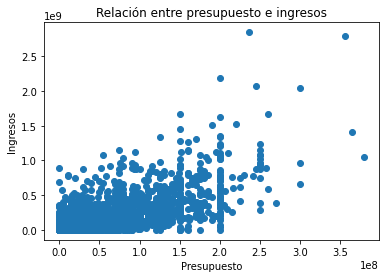

Coeficiente de relación:


,budget,revenue
budget,1.000000,0.757454
revenue,0.757454,1.000000


Mediana de presupuestos: 500000.0
Media de ingresos por encima de la mediana: 110036281.0823037
Media de ingresos por debajo de la mediana: 3054435.4811320757


,budget,revenue
0,4000000,4257354.0
1,21000000,12136938.0
2,11000000,775398007.0
3,94000000,940335536.0
4,55000000,677387716.0
...,...,...
9995,0,0.0
9996,0,0.0
9997,0,0.0
9998,0,0.0


In [10]:
cleaned = df.loc[:, ["budget", "revenue"]]

plt.scatter(cleaned['budget'].values, cleaned['revenue'].values)
plt.title('Relación entre presupuesto e ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()
plt.close('all')

print('Coeficiente de relación:')
display(cleaned.corr())
print('Mediana de presupuestos:',df['budget'].median())
mayor_mediana = cleaned.loc[df['budget'] >= 500000.0]
print('Media de ingresos por encima de la mediana:', mayor_mediana['revenue'].mean())
menor_mediana = cleaned.loc[df['budget'] < 500000.0]
print('Media de ingresos por debajo de la mediana:', menor_mediana['revenue'].mean())
display(cleaned)

<h2>Problema 14</h2>

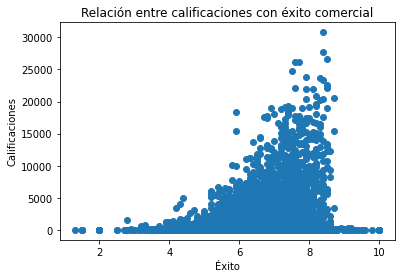

,voteAvg,voteCount
0,5.7,2077
1,6.5,223
2,8.2,16598
3,7.8,15928
4,8.5,22045
...,...,...
9995,6.8,108
9996,1.5,2
9997,6.1,30
9998,6.0,1


In [12]:
cleaned = df.loc[:, ["voteAvg", "voteCount"]]

plt.scatter(cleaned['voteAvg'].values, cleaned['voteCount'].values)
plt.title('Relación entre calificaciones con éxito comercial')
plt.xlabel('Éxito')
plt.ylabel('Calificaciones')
plt.show()
plt.close('all')

display(cleaned)

<h2>Problema Extra #1</h2>

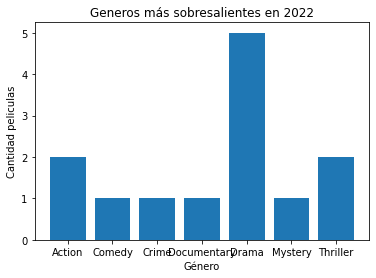

In [40]:
df['year'] = pd.DatetimeIndex(df['releaseDate']).year
peliculas = df.loc[df['year'] == 2022.0].reset_index()
registro = []
for x in range(len(peliculas)):
    registro.extend(peliculas['genres'][x].split('|'))

unicos = np.unique(registro)
cuenta = []

for reg in unicos:
    cont = 0
    for j in range(len(registro)):
        if reg == registro[j]:
            cont+=1
    cuenta.append(cont)

plt.bar(unicos, cuenta)
plt.title('Generos más sobresalientes en 2022')
plt.xlabel('Género')
plt.ylabel('Cantidad peliculas')
plt.show()
plt.close('all')

<h2>Problema Extra #2</h2>

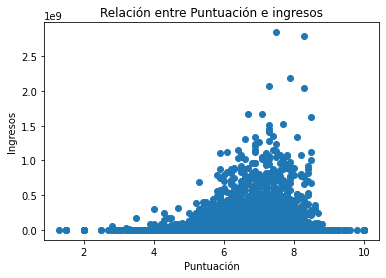

,voteAvg,revenue
0,5.7,4257354.0
1,6.5,12136938.0
2,8.2,775398007.0
3,7.8,940335536.0
4,8.5,677387716.0
...,...,...
9995,6.8,0.0
9996,1.5,0.0
9997,6.1,0.0
9998,6.0,0.0


In [42]:
cleaned = df.loc[:, ["voteAvg", "revenue"]]

plt.scatter(cleaned['voteAvg'].values, cleaned['revenue'].values)
plt.title('Relación entre Puntuación e ingresos')
plt.xlabel('Puntuación')
plt.ylabel('Ingresos')
plt.show()
plt.close('all')
display(cleaned)